In [2]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
frame = pd.read_csv("hq_markup_train.csv")

In [4]:
frame.head()

,file_name,department_name,user_name,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
0,e9c7e07f-b723-4da3-918e-7dbcb360c830,department2,user5,0,1,1,0,0,0,0,1,2.082030,0.109087,NaN,NaN,NaN,NaN,4.647373
1,726565c9-e05b-4a28-9079-22d94f9bb9e2,department3,user4,0,1,1,1,0,0,0,0,2.714919,1.220888,1.353544,NaN,NaN,NaN,NaN
2,c2a4d43d-5a93-4c37-81b6-d4fdc5b0280b,department3,user5,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15e04219-9fa0-401d-8b42-833b71ccafb3,department3,user5,0,1,1,0,0,0,0,0,1.909838,1.569424,NaN,NaN,NaN,NaN,NaN
4,d43f459d-97fa-4ab0-bacc-43e2cb73e1b9,department1,user1,0,1,1,1,0,0,0,0,1.298287,1.140658,0.387881,NaN,NaN,NaN,NaN


In [4]:
def get_sample(index, frame):
    uuid = frame.iloc[index, 0]
    with open(f'data/{uuid}', 'r') as f:
        content = f.read()
    rows = [line.split('\t') for line in content.strip().split('\n')]
    data = pd.DataFrame(rows, columns=['time', 'delta_p', 'p_'], dtype=float)
    return data

In [5]:


%matplotlib inline

def ploter(data):
    figure, ax = plt.subplots(figsize=(6, 6))
    ax.loglog(data['time'], data['delta_p'], 'o', label='Series 1')
    ax.loglog(data['time'], data['p_'], 'o', label='Series 2')
    plt.show()

In [6]:
def all_stat(index, frame):
    uuid_content = get_sample(index, frame)
    ploter(uuid_content)
    print(frame.iloc[index])
    print("=========")

In [7]:
bad = frame[frame['Некачественное ГДИС'] == 1]
bad[bad['Влияние ствола скважины'] == 1]

,file_name,department_name,user_name,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
26,aa1b26a5-70ac-41e1-9f80-04c1541c8f73,department3,user2,1,1,1,0,0,0,0,1,1.303977,0.585905,NaN,NaN,NaN,NaN,65.580717
88,55277586-8dca-41cf-a699-9a344297a5ca,department1,user2,1,1,0,0,0,0,0,0,0.729056,NaN,NaN,NaN,NaN,NaN,NaN
167,64c6fd7a-018d-4bcf-b784-c9fc3cbe2467,department3,user2,1,1,0,0,0,1,0,0,1.383816,NaN,NaN,NaN,1.198649,NaN,NaN
170,3a2659ac-c61a-45bb-9095-8bd63cb23bea,department3,user2,1,1,0,1,0,0,0,0,-0.544810,NaN,0.198623,NaN,NaN,NaN,NaN
193,3dd9313e-67ef-43b2-b9b9-72f9522cf120,department3,user2,1,1,0,0,0,0,0,0,-1.468733,NaN,NaN,NaN,NaN,NaN,NaN
290,46f5862e-13ca-449b-99cf-b50f16d6bfad,department2,user5,1,1,1,0,0,0,0,0,3.463488,1.659823,NaN,NaN,NaN,NaN,NaN
354,ecd48198-dc1b-4e9a-b102-da9c44b90818,department3,user2,1,1,0,1,0,0,0,0,2.603000,NaN,2.155839,NaN,NaN,NaN,NaN
382,b198b2b6-8f52-4721-9c62-9c748ae46c1b,department4,user2,1,1,0,1,0,0,0,0,-0.253771,NaN,-0.133642,NaN,NaN,NaN,NaN
394,a83c0c82-d080-4338-8119-10573902c7bf,department4,user5,1,1,0,0,0,0,0,0,-0.294495,NaN,NaN,NaN,NaN,NaN,NaN
404,3726671e-1adb-423e-bb8e-434e6320b808,department3,user2,1,1,1,1,0,0,0,0,1.484402,2.136548,0.444134,NaN,NaN,NaN,NaN


In [8]:
def get_gaz_index(frame):
    gaz_index = []

    for i in range(len(frame)):
        uuid_content = get_sample(i, frame)
        if any(uuid_content['delta_p'] >= 10e5):
            gaz_index.append(i)
    return gaz_index

In [9]:
gaz_index = get_gaz_index(frame)

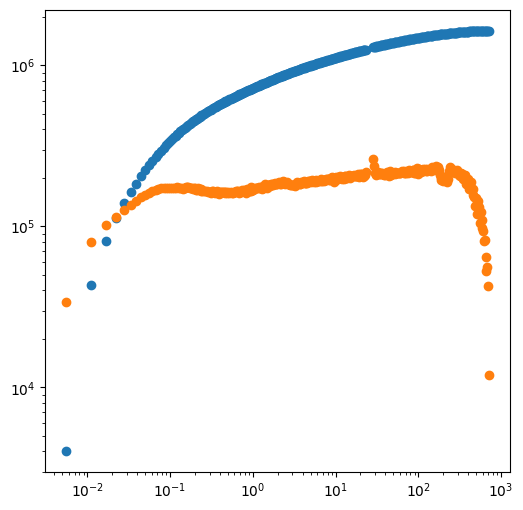

file_name                               2c9af460-5be6-41bc-971d-e9cacca1147e
department_name                                                  department2
user_name                                                              user5
Некачественное ГДИС                                                        0
Влияние ствола скважины                                                    1
Радиальный режим                                                           1
Линейный режим                                                             0
Билинейный режим                                                           0
Сферический режим                                                          0
Граница постоянного давления                                               1
Граница непроницаемый разлом                                               0
Влияние ствола скважины_details                                     6.817215
Радиальный режим_details                                            5.323298

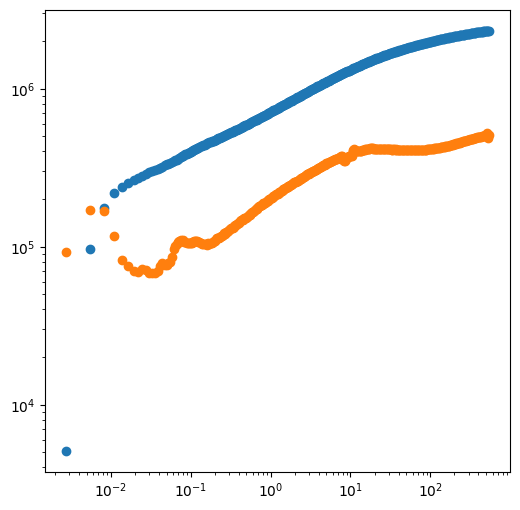

file_name                               2ba3b425-9680-4ae4-a862-09f46e6e1323
department_name                                                  department2
user_name                                                              user5
Некачественное ГДИС                                                        0
Влияние ствола скважины                                                    1
Радиальный режим                                                           1
Линейный режим                                                             0
Билинейный режим                                                           1
Сферический режим                                                          0
Граница постоянного давления                                               0
Граница непроницаемый разлом                                               0
Влияние ствола скважины_details                                      7.46549
Радиальный режим_details                                            5.625381

In [10]:
for i in gaz_index:
    all_stat(i, frame)

In [11]:
gaz = frame.iloc[gaz_index[0]][['Некачественное ГДИС', 'Влияние ствола скважины', 'Радиальный режим', 'Линейный режим', 'Билинейный режим', 'Сферический режим', 'Граница постоянного давления', 'Граница непроницаемый разлом']]

In [12]:
gaz

Некачественное ГДИС             0
Влияние ствола скважины         1
Радиальный режим                1
Линейный режим                  0
Билинейный режим                0
Сферический режим               0
Граница постоянного давления    1
Граница непроницаемый разлом    0
Name: 180, dtype: object

In [13]:
import numpy as np

In [14]:
frame[np.all(frame[['Некачественное ГДИС', 'Влияние ствола скважины', 'Радиальный режим', 'Линейный режим', 'Билинейный режим', 'Сферический режим', 'Граница постоянного давления', 'Граница непроницаемый разлом']]==gaz, axis=1)]

,file_name,department_name,user_name,Некачественное ГДИС,Влияние ствола скважины,Радиальный режим,Линейный режим,Билинейный режим,Сферический режим,Граница постоянного давления,Граница непроницаемый разлом,Влияние ствола скважины_details,Радиальный режим_details,Линейный режим_details,Билинейный режим_details,Сферический режим_details,Граница постоянного давления_details,Граница непроницаемый разлом_details
74,5a8b3964-db53-4130-8c9f-7824340513b8,department4,user4,0,1,1,0,0,0,1,0,6.674360,2.956444,NaN,NaN,NaN,6.292102,NaN
80,88131947-ed99-45aa-90d4-3a048306ff26,department1,user5,0,1,1,0,0,0,1,0,0.790224,1.702039,NaN,NaN,NaN,50.013628,NaN
82,9604bfa7-3583-4475-886a-16cbddab504d,department4,user6,0,1,1,0,0,0,1,0,6.035294,2.921079,NaN,NaN,NaN,0.326606,NaN
87,87fc69b3-8c28-416c-9379-c0ce1ef2583e,department3,user5,0,1,1,0,0,0,1,0,1.564731,0.969687,NaN,NaN,NaN,29.068667,NaN
89,1f204d9b-a7f6-47b2-b4e7-63d91c41efb5,department3,user4,0,1,1,0,0,0,1,0,2.139286,-0.084370,NaN,NaN,NaN,44.397882,NaN
104,670ee000-cd81-495e-88f7-0d22fefe6283,department2,user5,0,1,1,0,0,0,1,0,2.371951,0.755428,NaN,NaN,NaN,13.695315,NaN
114,9262a383-6439-4a84-9d0b-70f9d7d615fe,department3,user4,0,1,1,0,0,0,1,0,1.386872,0.714007,NaN,NaN,NaN,126.179101,NaN
180,2c9af460-5be6-41bc-971d-e9cacca1147e,department2,user5,0,1,1,0,0,0,1,0,6.817215,5.323298,NaN,NaN,NaN,331.653353,NaN
187,58a350d3-0ae2-4126-baaf-c6ab79fc6ded,department2,user5,0,1,1,0,0,0,1,0,1.881064,0.631202,NaN,NaN,NaN,55.150308,NaN
205,cee48032-d4d1-4ce5-9e77-bfc15a38c145,department2,user14,0,1,1,0,0,0,1,0,1.891529,1.469097,NaN,NaN,NaN,77.800868,NaN


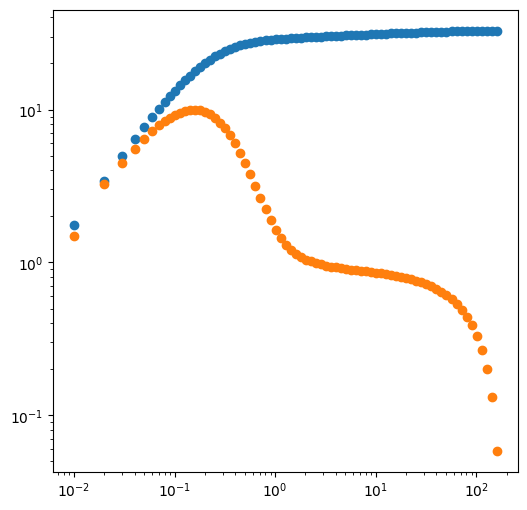

file_name                               1f204d9b-a7f6-47b2-b4e7-63d91c41efb5
department_name                                                  department3
user_name                                                              user4
Некачественное ГДИС                                                        0
Влияние ствола скважины                                                    1
Радиальный режим                                                           1
Линейный режим                                                             0
Билинейный режим                                                           0
Сферический режим                                                          0
Граница постоянного давления                                               1
Граница непроницаемый разлом                                               0
Влияние ствола скважины_details                                     2.139286
Радиальный режим_details                                            -0.08437

In [15]:
all_stat(89, frame)